# Домашнее задание к семинару 02 (HW02)
## Тема: работа с табличными данными в Pandas, контроль качества данных, базовый EDA и визуализация в Matplotlib.
### Содержание ноутбука `HW02.ipynb` (основная часть)

В ноутбуке `homeworks/HW02/HW02.ipynb` необходимо выполнить следующие шаги.

#### 1. Загрузка данных и первичный осмотр

1. Импортировать необходимые библиотеки:
   - `pandas` (обязательно),
   - при необходимости `numpy`,
   - `matplotlib.pyplot` для визуализации.
2. Загрузить учебный датасет в `pandas.DataFrame` с помощью `pd.read_csv` (или другого подходящего метода).
3. Вывести:
   - первые строки датасета (`head()`),
   - информацию о столбцах и типах (`info()`),
   - базовые описательные статистики (`describe()` или аналог).

#### 2. Пропуски, дубликаты и базовый контроль качества

1. Посчитать долю пропусков в каждом столбце (например, через `isna().mean()` или аналог).
2. Проверить наличие полностью дублирующих строк (через `duplicated()`).
3. Найти и вывести «подозрительные» случаи, исходя из смысла датасета. Примеры:
   - отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);
   - нереалистичные значения (например, возраст > 100, нулевой доход при ненулевых количествах и т.п.);
   - другие логические противоречия, характерные для конкретного датасета.
4. Кратко (1-2 абзаца) описать текстом, какие проблемы качества данных были обнаружены.

#### 3. Базовый EDA: группировки, агрегаты и частоты

1. Посчитать частоты для одной или двух категориальных переменных (например, `value_counts()` для столбца с категорией/страной/классом).
2. Выполнить хотя бы одну осмысленную группировку с агрегатами через `groupby`:
   - например, среднее и сумму по количественным признакам в разрезе категорий.
3. При необходимости ввести дополнительные «коридоры» (bins) или группировки (например, возрастные группы, диапазоны значений и т.п.).
4. Кратко (1-2 абзаца) описать текстом основные наблюдения:
   - какие категории доминируют,
   - как отличаются группы по средним значениям,
   - есть ли неожиданные эффекты.

#### 4. Визуализация данных в Matplotlib

В том же ноутбуке `HW02.ipynb` нужно построить как минимум:

1. **Одну гистограмму** для количественного признака:
   - осмысленный выбор числа корзин (`bins`),
   - подписи осей и заголовок.

2. **Один боксплот (boxplot)** для количественного признака:
   - можно как общий, так и по группам (например, по категориям),
   - подписи оси и заголовок.

3. **Один scatter plot** (диаграмма рассеяния) для пары количественных признаков:
   - подписи обеих осей,
   - заголовок,
   - при желании можно добавить цвет/легенду для различения категорий.

4. Сохранить **минимум один** из построенных графиков в папку `homeworks/HW02/figures/`:
   - использовать `plt.savefig(...)` или аналог;
   - убедиться, что файл действительно появляется в репозитории и может быть открыт отдельно от ноутбука.

#### Опциональная часть: мостик к проекту

Опциональная (но рекомендованная) часть для тех, кто уже определился с темой проекта и имеет или может сгенерировать данные.

1. В папке `project/` создать (если ещё нет) папку `notebooks/`.
2. Создать ноутбук `project/notebooks/eda_v1.ipynb`.
3. В этом ноутбуке:
   - загрузить небольшой фрагмент будущих проектных данных (или реалистичный синтетический пример, если «боевые» данные пока недоступны);
   - выполнить минимум 3 простых проверки качества:
     - пропуски,
     - дубликаты,
     - подозрительные значения;
   - сделать 2-3 базовых графика (hist/boxplot/scatter) для ключевых признаков;
   - добавить 3-5 коротких текстовых наблюдений о данных.

# 1. Загрузка данных и первичный осмотр

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("S02-hw-dataset.csv")

In [3]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


Содержатся в датасете следующие данные: id человека, возраст, страна, количество покупок и доход. Датасет небольшой.

In [4]:
df

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [6]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


# 2. Пропуски, дубликаты и базовый контроль качества

#### Пропуски

In [7]:
print(f"Количество пропусков по колонкам:\n{df.isna().sum()}")

Количество пропусков по колонкам:
user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64


In [8]:
print(f"Количество пропусков по колонкам:\n{df[df.isna().any(axis=1)]}")

Количество пропусков по колонкам:
    user_id  age country  purchases  revenue
4         5  NaN      DE          6     1296
12       13  NaN      US          9      630


#### Дубликаты

In [9]:
print("Дубликаты: ")
df[df.duplicated()==True]

Дубликаты: 


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [10]:
print(f"Доля пропусков\n{df.isna().mean()}")

Доля пропусков
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


#### Подозрительные значения

1. Покупки и доход не сходятся

In [11]:
df[((df["purchases"]==0) & (df["revenue"]>0))]

,user_id,age,country,purchases,revenue


In [12]:
df[((df["purchases"]>0) & (df["revenue"]==0))]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


2. Покупки и доходы меньше 0, возраст меньше 10 или 100

In [13]:
df[(df["purchases"] < 0)|
    (df["revenue"] < 0)|
    (df["age"] <= 10) |
    (df["age"] > 100)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


3. Количество различных классов, проверка на наличие некорректных

In [14]:
df["country"].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

#### Какие проблемы качества данных были обнаружены
Имеем следующие проблемные колонки:
- 10. Дубликат
- 5. Человеку 120 лет, совершена -1 покупка
- 20. Человеку 5 лет, доход 1488
- 4. NaN в возрасте
- 12. NaN в возрасте
 

В колонке стран нет проблем.

In [15]:
# Избавимся от проблемных колонок
ok_df = df.drop([4,5,10,12,20])

# 3. Базовый EDA: группировки, агрегаты и частоты

In [16]:
ok_df.describe()

,user_id,age,purchases,revenue
count,36.000000,36.000000,36.000000,36.000000
mean,21.500000,35.416667,4.777778,817.305556
std,11.719337,11.425223,2.564718,624.596227
min,1.000000,18.000000,0.000000,0.000000
25%,11.500000,24.750000,3.000000,425.000000
50%,22.500000,33.500000,5.000000,673.500000
75%,31.250000,45.250000,7.000000,1106.750000
max,40.000000,57.000000,11.000000,2475.000000


Введем дополнительные «коридоры» (bins) или группировки (например, возрастные группы, диапазоны значений и т.п.)

In [17]:
print(f"Частоты стран: \n{ok_df["country"].value_counts()}")

Частоты стран: 
country
RU    12
FR    11
US     6
DE     5
CN     2
Name: count, dtype: int64


In [18]:
ok_df["revenue_cats"] = pd.cut(ok_df['revenue'], bins=[-1, 800, 1600, 2500], 
        labels=['Low', 'Mid', 'High'])

In [19]:
ok_df["age_cats"] = pd.cut(ok_df['age'], bins=[0, 25, 50, 70, 100], 
        labels=['15-25', '26-50', '51-70','70-100'])

In [20]:
ok_df["purchase_cats"] = pd.cut(ok_df['purchases'], bins=[-1,0, 4, 8, 12], 
        labels=['0', '0<', '4<', '8<'])

In [21]:
ok_df.head()

,user_id,age,country,purchases,revenue,revenue_cats,age_cats,purchase_cats
0,1,25.0,FR,7,749,Low,15-25,4<
1,2,24.0,RU,5,1115,Mid,15-25,4<
2,3,52.0,FR,7,399,Low,51-70,4<
3,4,31.0,RU,6,654,Low,26-50,4<
6,7,46.0,RU,0,0,Low,26-50,0


Группировка с агрегатами через groupby, например, среднее и сумму по количественным признакам в разрезе категорий

Частоты для категориальных переменных

In [22]:
country_stats = ok_df.groupby('country', observed=True).agg({
    'purchases': ['count', 'mean', 'median'],
    'revenue': ['mean', 'median'],
    'age': ['mean', 'median']
}).round(2)

In [23]:
revenue_stats = ok_df.groupby('revenue_cats', observed=True).agg({
    'purchases': ['count', 'mean', 'median'],
    'revenue': ['mean', 'median'],
    'age': ['mean', 'median']
}).round(2)

In [24]:
age_stats = ok_df.groupby('age_cats', observed=True).agg({
    'purchases': ['count', 'mean', 'median'],
    'revenue': ['mean', 'median'],
    'age': ['mean', 'median']
}).round(2)

In [25]:
purchase_stats = ok_df.groupby('purchase_cats', observed=True).agg({
    'purchases': [ 'count', 'mean', 'median'],
    'revenue': ['mean', 'median'],
    'age': ['mean', 'median']
}).round(2)

In [26]:
country_stats

purchases               revenue            age       
            count  mean median     mean  median   mean median
country                                                      
CN              2  4.50    4.5  1054.00  1054.0  24.00   24.0
DE              5  6.60    6.0  1475.40  1104.0  34.60   35.0
FR             11  4.73    6.0   666.00   546.0  39.55   39.0
RU             12  4.50    5.5   731.92   580.5  32.17   28.5
US              6  4.00    4.0   638.17   636.5  38.83   40.5

In [27]:
age_stats

purchases             revenue           age       
             count mean median    mean median   mean median
age_cats                                                   
15-25           10  5.0    5.0  692.00  580.5  22.50   23.5
26-50           20  4.6    4.5  946.15  783.0  36.45   35.0
51-70            6  5.0    6.0  596.67  546.0  53.50   53.0

In [28]:
purchase_stats

purchases                revenue            age       
                  count   mean median     mean  median   mean median
purchase_cats                                                       
0                     3   0.00    0.0     0.00     0.0  32.67   28.0
0<                   12   2.83    3.0   579.58   449.0  38.00   40.5
4<                   19   6.21    6.0   928.16   702.0  34.37   32.0
8<                    2  10.00   10.0  2416.50  2416.5  34.00   34.0

In [29]:
revenue_stats

purchases               revenue            age       
                 count  mean median     mean  median   mean median
revenue_cats                                                      
Low                 22  3.95    4.0   424.05   443.5  35.86   32.0
Mid                  9  5.00    5.0  1101.67  1104.0  36.89   39.0
High                 5  8.00    7.0  2035.80  2086.0  30.80   32.0

**Страны**

Германия (DE) демонстрирует наивысшие показатели как по количеству покупок (6.6 в среднем), так и по доходу (1475.4), что значительно превышает результаты других стран. При этом пользователи из Германии относительно молоды (средний возраст 34.6 года). Франция (FR) и Россия (RU) показывают средние результаты, тогда как США (US) имеют наименьший средний доход (638.17) при возрасте пользователей около 39 лет.

**Возраст**

Наиболее финансово успешной является возрастная группа 26-50 лет со средним revenue 946.15, что существенно выше других возрастных категорий. Четко прослеживается прямая зависимость между активностью покупок и доходом - пользователи с 8+ покупками приносят в среднем 2416.5 дохода, что в 4 раза превышает показатели группы с низкой активностью. Высокодоходная группа ("High") состоит из относительно молодых пользователей (средний возраст 30.8 лет), но совершает почти вдвое больше покупок, чем низкодоходная категория.

# 4. Визуализация данных в Matplotlib

### Гистограмма для количественного признака

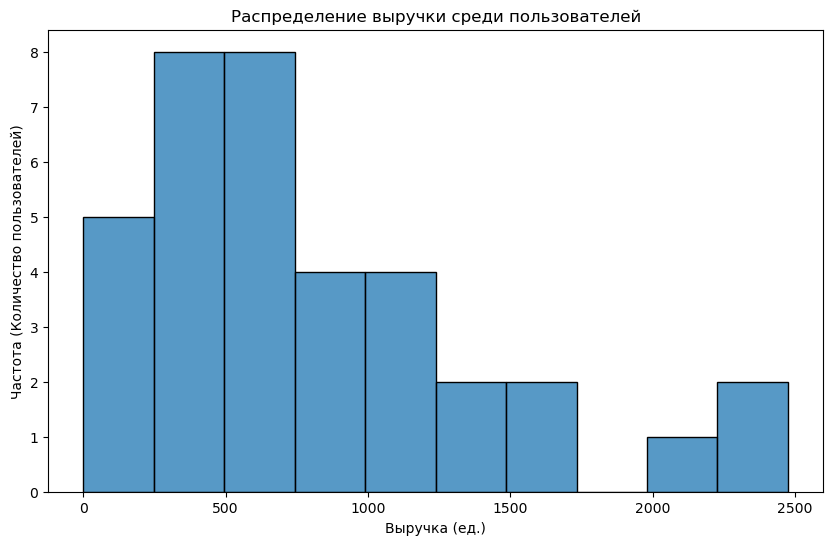

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(ok_df['revenue'], bins=10, kde=False) # 10 корзин
plt.title('Распределение выручки среди пользователей')
plt.xlabel('Выручка (ед.)')
plt.ylabel('Частота (Количество пользователей)')
plt.savefig("figures/hist.png")
plt.show()

### Боксплот (boxplot) для количественного признака

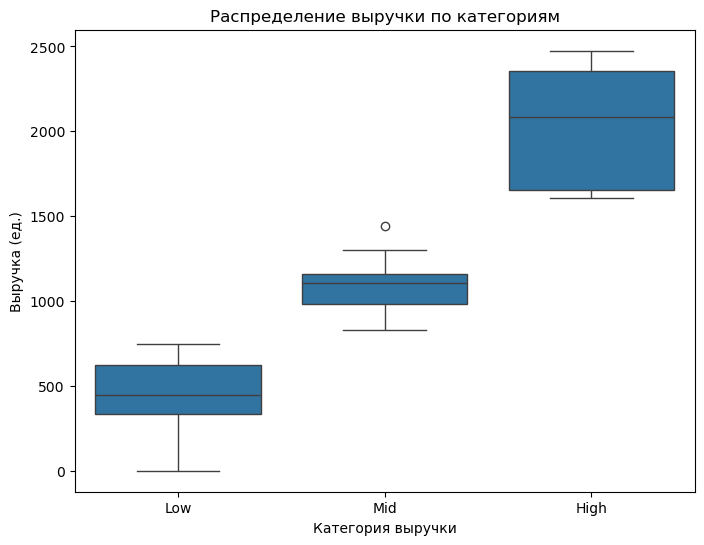

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='revenue_cats', y='revenue', data=ok_df, order=['Low', 'Mid', 'High'])
plt.title('Распределение выручки по категориям')
plt.xlabel('Категория выручки')
plt.ylabel('Выручка (ед.)')
plt.savefig("figures/boxplot.png")
plt.show()

### scatter plot (диаграмма рассеяния) для пары количественных признаков

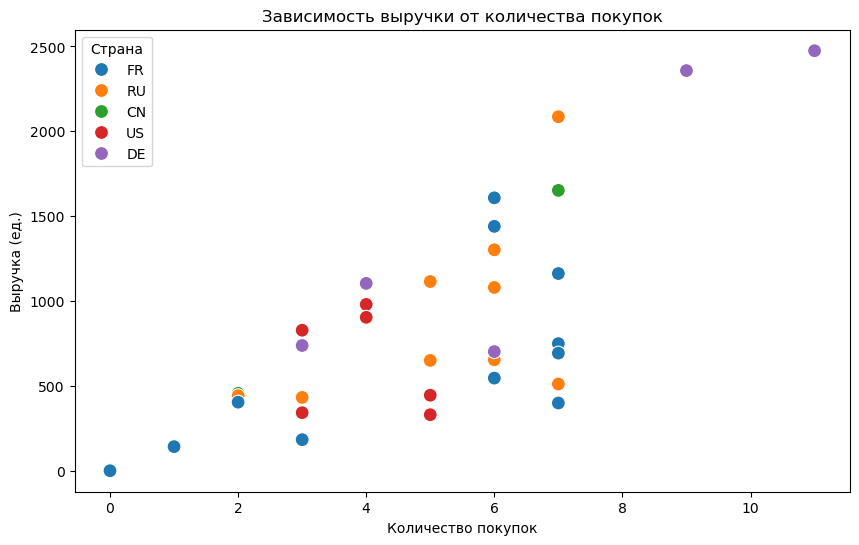

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='purchases', y='revenue', hue='country', data=ok_df, s=100) # s - размер точек
plt.title('Зависимость выручки от количества покупок')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка (ед.)')
plt.legend(title='Страна')
plt.savefig("figures/scatter.png")
plt.show()